In [1]:
# importing required libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import random


def design_matrix(x_train, M):
    # This function generates a design matrix for polynomial regression based on input data and a specified polynomial degree.

    m = M + 1  # Number of features (polynomial degree + 1 for the bias term).

    s = x_train.tolist()  # Convert the input data into a list of lists.
    
    for i in range(len(s)):
        s[i] = s[i][0]  # Extract scalar values from nested lists (flattening the data).

    x = 1 
    t = [] 

    for j in s:  # Iterate through each data point.
        t.append([])  # Add a new row in the design matrix.
        for i in range(0, m):  # Generate polynomial features for each data point.
            t[-1].append(j ** i)  

    return np.array(t)  # Return the design matrix as a NumPy array.



In [2]:

def polynomial(X, w): 
# This function calculates the output of a polynomial function given input data (X)
# and a set of weights/coefficients (w).
    X=X.tolist()
    
    w=w.tolist()

    g=[]
    for i in X:
        h=0
        for j in range(0,len(w)):
            print(type(w[j]))
            h+=w[j]*(i**j)
        g.append(h)
    return(g)

In [3]:

def mean_squared_error(y_pred, y_real):
# This function calculates the Mean Squared Error (MSE) for predicted vs. actual values.
# MSE is a common metric to evaluate the accuracy of regression models.
    N=len(y_pred)
    error = 0.5*N * (norm)
    tafavot=0
    for i in range (len(y_pred)):
            tafavot+=(y_pred[i]-y_real[i])**2
    error= np.sqrt(tafavot) /(2*N)
    return(error)


In [4]:
def least_squares(x_train, y_train, M):
# This function performs the Least Squares regression method to compute the optimal 
# weights for a polynomial model and calculates the error for the fit.
    psi= design_matrix(x_train,M)
    # Compute the weight vector (w) using the Normal Equation: w = (F^T * F)^(-1) * F^T * y_train.
    tpsi= psi.transpose()

    a= np.linalg.inv((np.dot(tpsi,psi))) 
    b=np.dot(a,tpsi)
    w=np.dot(b,y_train)
    

    meow = x_train.tolist()
    j=[]
    for i in meow:
        j.append(i[0])
    j=np.array(j)


    babae = w.tolist()
    q=[]
    for a in babae:
        q.append(a[0])
    q=np.array(q)
    
    # Compute the error between the model predictions and actual values using MSE.
    err= mean_squared_error(y_train,polynomial(j,q))
    w=w.transpose()
    w=w[0]

    return (w, err)


In [ ]:
def model_selection(x_train, y_train, x_val, y_val, M_values):
    # This function selects the best polynomial model by evaluating performance on validation data.
    # It uses Least Squares to fit models of varying degrees (M_values) and compares their errors.
    M=M_values 

    wmatrix=[]
    errmatrix=[]
    
    # Fit polynomial models for each degree in M_values and store their weights.
    for i in M:
        wmatrix.append(least_squares(x_train, y_train, i)[0])
    # Evaluate the validation error for each model using the stored weights.
    for j in wmatrix:
         errmatrix.append(mean_squared_error(polynomial(x_val, j), y_val))
    # Identify the model with the minimum validation error.
    err=min(errmatrix)
        
    # Weights corresponding to the best model
    w=wmatrix[errmatrix.index(err)]

    # Calculate training and validation errors for the selected model.
    train_err=mean_squared_error(polynomial(x_train, w), y_train)

    val_err=mean_squared_error(polynomial(x_val, w), y_val)

    return (w, train_err, val_err)

In [ ]:
#run models and our model
def run():
    def target_output(x):
        return np.sin(2 * np.pi * x)

    def plot_model(subplot, x_train, y_train, x, y_obj, y_model, x_val=None, y_val=None, train_err=None,
               val_err=None):
        x_min = np.min([np.min(x_train), np.min(x)])
        x_max = np.max([np.max(x_train), np.max(x)])
        y_min = -1.5
        y_max = 1.5
        int_x = x_max - x_min
        x_beg = x_min - int_x / 14.0
        x_end = x_max + int_x / 14.0
        x_ticks = [x_min, x_max]
        int_y = y_max - y_min
        y_ticks = [y_min, y_min + 0.5 * int_y, y_max]

        sub.set_xlim(x_beg, x_end)
        sub.set_ylim(1.1 * y_min, 1.1 * y_max)
        sub.set_xticks(x_ticks)
        sub.set_yticks(y_ticks)
        sub.plot(x_train, y_train, 'o', markerfacecolor='none', markeredgecolor='blue', markersize=8,
                 markeredgewidth=2)
        sub.plot(x, y_obj, '-g', linewidth=2)
        sub.plot(x, y_model, '-r', linewidth=2)
        if x_val is not None and y_val is not None:
            sub.plot(x_val, y_val, 'o', markerfacecolor='none', markeredgecolor='red', markersize=8,
                     markeredgewidth=2)
        if train_err is not None and val_err is not None:
            sub.text(0, -1.3, 'Train error: {0:.5f}\nVal error:    {1:.5f}'.format(train_err, val_err),
                     bbox={'facecolor': 'none', 'pad': 10})

    
    
    def create_data():
        np.random.seed(1)
        x_train_8 = np.random.sample((8,1))*1.5
        x_train_50 = np.random.rand(50,1)
        x_val_10 = np.random.rand(10,1)
        x_val_20 = np.random.rand(20,1)
        y_train_8 = target_output(x_train_8) + np.random.randn(8,1)/3
        y_train_50 = target_output(x_train_50) + np.random.randn(50,1)/3
        y_val_10 = target_output(x_val_10) + np.random.randn(10,1)/3
        y_val_20 = target_output(x_val_20) + np.random.randn(20,1)/3
        
        created_data = {'x_train_8': x_train_8, 'x_train_50': x_train_50, 'x_val_10': x_val_10, 'x_val_20': x_val_20, 
                        'y_train_8': y_train_8, 'y_train_50': y_train_50, 'y_val_10': y_val_10, 'y_val_20': y_val_20}
        return created_data
    data = create_data()#pickle.load(open('LinearRegression/data.pkl', mode='rb'))
    
    x_plot = np.arange(0, 1.01, 0.01)
    y_obj = target_output(x_plot)

    # Dopasowanie wielomianow metoda najmniejszych kwadratow
    print('\n---Mean ---')
    print('-------------- Training examples amount N=8. --------------')
    fig = plt.figure(figsize=(12, 6), num='Least squuares task for N=8')

    for i in range(8):
        w, err = least_squares(data['x_train_8'], data['y_train_8'], i)
        y_model = polynomial(x_plot, w)
        sub = fig.add_subplot(2, 4, i + 1)
        plot_model(sub, data['x_train_8'], data['y_train_8'], x_plot, y_obj, y_model)
        sub.set_title("M = {}".format(i))

    plt.show()

    print('\n--- Fitting polynomials with least squares method ---')
    print('-------------- Training examples amount N=50. --------------')
    fig = plt.figure(figsize=(12, 6), num='Least squares task for N=50')

    for i in range(8):
        w, err = least_squares(data['x_train_50'], data['y_train_50'], i)
        y_model = polynomial(x_plot, w)
        sub = fig.add_subplot(2, 4, i + 1)
        plot_model(sub, data['x_train_50'], data['y_train_50'], x_plot, y_obj, y_model)
        sub.set_title("M = {}".format(i))

    plt.show()

    # Model selection
    print('\n--- Model Selection ---')
    print('---------------- Polynomial models degree M=0,...,7 ----------------')
    print('- Data training points number N=50. Validation data points number N=20 -')

    M_values = range(0, 7)
    w, train_err, val_err = model_selection(data['x_train_50'], data['y_train_50'],
                                            data['x_val_20'], data['y_val_20'], M_values)
    M = np.shape(w)[0] - 1
    y_model = polynomial(x_plot, w)
    fig = plt.figure(figsize=(6, 5), num='Selection model for M')
    sub = fig.add_subplot(1, 1, 1)
    sub.set_title('The best M={}'.format(M))
    plot_model(sub, data['x_train_50'], data['y_train_50'], x_plot, y_obj, y_model,
               data['x_val_20'], data['y_val_20'], train_err, val_err)

    plt.show()



---Mean ---
-------------- Training examples amount N=8. --------------
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>

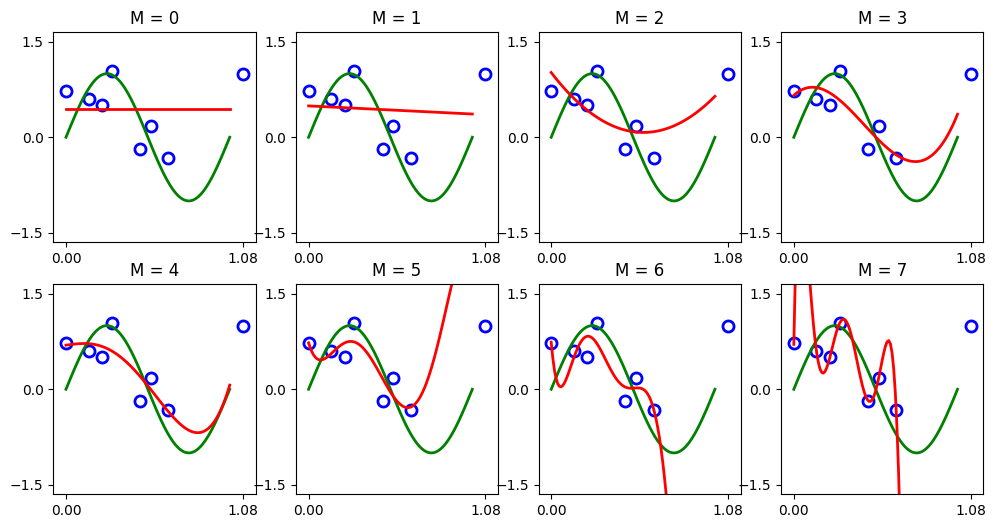


--- Fitting polynomials with least squares method ---
-------------- Training examples amount N=50. --------------
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<cla

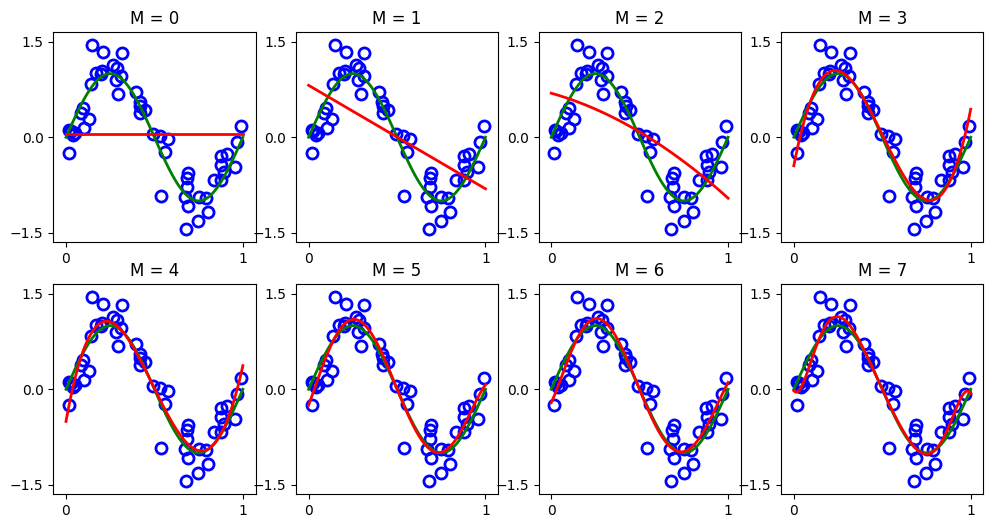


--- Model Selection ---
---------------- Polynomial models degree M=0,...,7 ----------------
- Data training points number N=50. Validation data points number N=20 -
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [ ]:
run()

In [188]:
def der(x, y_expected, w, b):
    # Computes the derivative of the cost function with respect to the weight (w).
    
    b = np.array([[b for i in range(np.shape(x)[0])]]).T  # Create a bias vector with the same shape as input.
    a = y_expected - ((x * w) + b)  # Calculate residuals (difference between expected and predicted values).
    c = 0  # Initialize derivative accumulator.

    for i in range(np.shape(x)[0]):  # Loop through each data point.
        c += x[i, 0] * a[i, 0]  # Accumulate the gradient contribution of each data point.
       
    return -1 * c * 2 / np.shape(x)[0]  # Return the average gradient with respect to w.

def dar(x, y_expected, w, b):
    # Computes the derivative of the cost function with respect to the bias (b).
    
    b = np.array([[b for i in range(np.shape(x)[0])]]).T  # Create a bias vector with the same shape as input.
    a = y_expected - ((x * w) + b)  # Calculate residuals.
    c = 0  # Initialize derivative accumulator.

    for i in range(np.shape(x)[0]):  # Loop through each data point.
        c += -1 * a[i, 0]  # Accumulate the gradient contribution of each data point.
        
    return c * 2 / np.shape(x)[0]  # Return the average gradient with respect to b.


def gradient_descent(x, y_expected, epochs=1000, learning_rate=0.00001):
    # Performs gradient descent to minimize the cost function for a linear regression model.
    # Returns the optimal weights, bias, and the cost history over epochs.
    n = np.shape(x)[0]
    N=n
    rond_w=0
    rond_b=0
    
    w = random.uniform(0, 1)
    b = random.uniform(0, 1)
    cost=[]
    for j in range(epochs):
        rond_w=0
        rond_b=0
        for i in range (0,N):
            rond_w+=-1*(x[i,0]* (y[i,0]-(w * x[i,0]+b))) 
            rond_b+=-1*(y[i,0]-(w * x[i,0]+b)) 
        rond_w=2*rond_w/N
        rond_b=2*rond_b/N
        w =w - learning_rate * rond_w
        b= b - learning_rate * rond_b
        a=0
        for m in range(0,N):
            a += (y[m,0]-(w * x[m,0] + b))**2 
        cost.append(a)
    cost=np.array(cost)
    cost=cost/N

    return w, b, cost

In [192]:
x = np.array([[i for i in range(10)]]).T
y = np.array([[5 * i + 10 + random.uniform(-.1, .1) for i in range(10)]]).T
print("W expected: {} and b expected: {}".format(5, 10))
print()
w, b, C = gradient_descent(x,y)
print("W calculated: {:.2f} and b calculated: {:.2f}".format(w, b))
print(C)

W expected: 5 and b expected: 10

W calculated: 2.91 and b calculated: 0.79
[1181.26622402 1179.91140407 1178.55816675 1177.20651022 1175.85643264
 1174.50793215 1173.16100691 1171.81565509 1170.47187484 1169.12966433
 1167.78902172 1166.44994519 1165.1124329  1163.77648302 1162.44209373
 1161.10926321 1159.77798964 1158.44827119 1157.12010605 1155.79349241
 1154.46842844 1153.14491235 1151.82294232 1150.50251655 1149.18363323
 1147.86629055 1146.55048673 1145.23621996 1143.92348845 1142.6122904
 1141.30262401 1139.99448751 1138.68787911 1137.38279701 1136.07923944
 1134.77720461 1133.47669074 1132.17769606 1130.8802188  1129.58425718
 1128.28980942 1126.99687376 1125.70544844 1124.41553169 1123.12712174
 1121.84021684 1120.55481523 1119.27091515 1117.98851484 1116.70761256
 1115.42820655 1114.15029507 1112.87387637 1111.59894871 1110.32551034
 1109.05355952 1107.78309452 1106.51411359 1105.24661502 1103.98059705
 1102.71605797 1101.45299605 1100.19140956 1098.93129677 1097.67265597
 1

In [190]:
def real_world_example():
    # Demonstrates a real-world application of linear regression using study hours and exam scores.
    # Load data points from a CSV file ("D:\\data.txt") with two columns: hours of study and exam scores.
    points = np.genfromtxt("data.txt", delimiter=',')
    print('Some example hours and scores from exam:')
    print(points[:5])
    x, y = points[0], points[1]

    x=np.array([[i for i in x]]).T 
    y=np.array([[i for i in y]]).T 
   

    w, b, costs = gradient_descent(x, y, epochs=30000, learning_rate=1e-8)
    print(w,b)
    plt.plot(costs)
    plt.title('Cost')
    plt.xlabel('Epoch number')
    plt.ylabel('Cost value')
    plt.grid()
    plt.show()
    x_plot = np.arange(20, 70, 0.5)
    y_plot = x_plot*w+b
    
    hours = points[:,0]
    scores = points[:,1]
    plt.plot(hours, scores, '.', x_plot, y_plot, '-')
    plt.xlabel('Hours of study')
    plt.ylabel('Scores on exam')
    plt.legend(['Score points', 'Linear regression'])
    plt.grid()
    
    plt.show()


Some example hours and scores from exam:
[[32.50234527 31.70700585]
 [53.42680403 68.77759598]
 [61.53035803 62.5623823 ]
 [47.47563963 71.54663223]
 [59.81320787 87.23092513]]
0.4912107719951168 0.7801057914755962


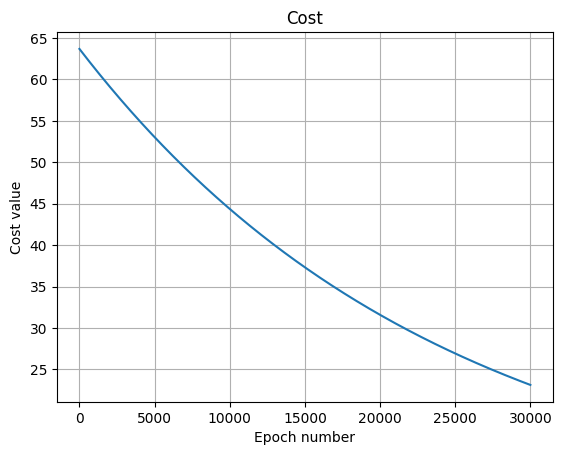

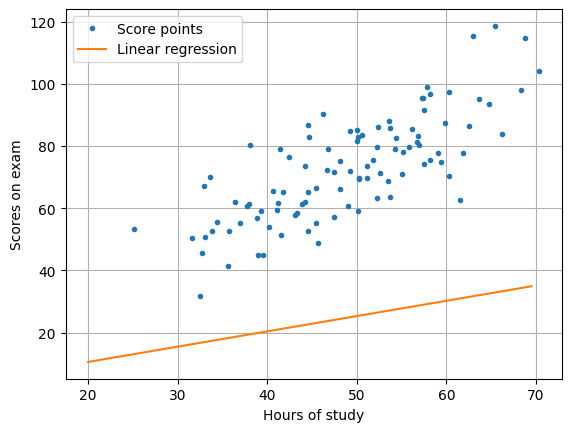

In [193]:
#test our model
real_world_example()